# Are neighbourhoods of New york and Toronto similar?

## Table of Contents
1. Introduction/Business problem <br>
   1.1 Background and Importance <br>
2. Data Understanding <br>
   2.1 Data Processing <br>
       2.1.1 Toronto
       2.1.2 New York
3. Methodology <br>
4. Results <br>
5. Discussion <br>
6. Conclusion <br>

## 1. Introduction/Business problem

We know that the cities **New York** and **Toronto** are very diverse and are the financial capitals of their
respective countries. One interesting idea would be to compare the neighborhoods of the two cities and
determine how similar or dissimilar they are. Is New York City more like Toronto? Can we identify how
similar are the neighbourhoods of New York to the neighbourhoods of toronto?

### 1.1 Background and Importance

We need to explore the neighbourhoods of the two cities using *Foursquare API* and apply the *k-means
clustering* algorithm for grouping the neighbourhoods of the two cities. By forming the clusters, we can
understand how many neighbourhoods of New York are similar to Toronto.

This problem would be helpful to the people who are having trouble in taking a decision of choosing a
neighbourhood of the city to take residence or choosing a neighbourhood of the city to have
breakfast,lunch or dinner or choosing a neighbourhood of the city to travel as some people choose to
travel to cities which are different from the cities they have already visited while some people choose to
travel to cities which are similar to the cities they have already visited.

## 2. Data Understanding

As the neighbourhoods in New York are very large in number, I have chosen only the neighbourhoods in
the borough **Manhattan** for representing New York. We can collect the location data of the
neighbourhoods of New York and Toronto and explore the top 100 venues around each neighbourhood
using the Foursquare API. Moreover, we are exploring the top 100 venues around each neighbourhood
for both cities because we need some means of comparison between the neighbourhoods for grouping.
By using these venues for the neighbourhoods we can apply one hot encoding and build a metric of
comparison based on the category types of each venue.

Import the necessary packages

In [446]:
import numpy as np
import pandas as pd
import lxml
import json
import html5lib
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
import requests
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

## 2.1 Data Processing

### Step 1

Create a dataframe which shows the location coordinates of the neighbourhoods.

### Step 2

Get the top 100 venues around each neighbourhood location into a new dataframe for both cities.It looks
as shown below.

### Step 3

Perform one hot encoding on the dataframe obtained from step 2 for each neighbourhood based on the
category type for both cities into a new dataframe. It consists of all category types as the columns.

### Step 4

Perform the group by neighbourhood operation on the dataframe in Step 3 and perform the mean
operation on each group which will give the mean occurence/frequency of each category in the respective
neighbourhood.Perform it for both cities.

### Step 5

Create a new dataframe which shows neighbourhood along with top 10 venues in the
respective neighbourhood. Perform it for both cities.

### Step 6

Concatenate the two dataframes of two cities obtained from step 4. It simply combines the
neighbourhoods of New York and Toronto. Each row shows a category metric of each neighbourhood
based on which we perform k-means clustering.

### Step 7

Add a City column to the two dataframes obtained from Step 5. Concatenate the two dataframes of two
cities obtained from step 5. It simply combines the neighbourhoods of new york and toronto. Each row
shows the top 10 venues of the respective neighbourhood.

### 2.1.1 Toronto

Fetch the neighbourhood data of canada from the below url into a dataframe

In [447]:
link = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_list = pd.read_html(link)

df_list in the above cell is a list of dataframe objects.Pick the required element(i.e. dataframe) in the list which includes the postal codes and neighbourhood data

In [448]:
df = df_list[0]

Get a picture of the dataframe extracted

In [449]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Rename the Postcode and neighbourhood columns accordingly

In [450]:
df.rename(columns={'Postcode':'PostalCode','Neighbourhood':'Neighborhood'},inplace=True)

Ignore the rows in the dataframe where borough values are mentioned as Not assigned

In [451]:
df = df[df['Borough']!='Not assigned']

Perform the groupby operation to group the rows by PostalCode and join the Neighbourhood column into a comma separated values of neighbourhoods in the group

In [452]:
df = df.groupby('PostalCode',as_index=False).agg({'Borough':'first','Neighborhood':','.join})

Iterate the dataframe and replace the neighbourhood values with borough values in the rows where there is some borough value assigned but the neighbourhood value is equal to Not assigned

In [453]:
for index,row in df.iterrows():
    if(row['Neighborhood'] == 'Not assigned'):
        df.replace(row['Neighborhood'],row['Borough'],inplace=True)

Get a picture of the dataframe after all operations

In [454]:
df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


Get the number of rows in the dataframe using the shape method

In [455]:
df.shape[0]

103

Get the location data into a new dataframe named df_geo

In [456]:
df_geo = pd.read_csv('Geospatial_Coordinates.csv')

Rename the columns accordingly

In [457]:
df_geo.rename(columns={'Postal Code':'PostalCode'},inplace=True)

Get a picture of the location dataframe

In [458]:
df_geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merge the neighbourhood dataframe(df) with the location dataframe(df_geo) into a new dataframe df_location

In [459]:
df_location = df.merge(df_geo,how='inner',on='PostalCode')

Get a picture of the merged dataframe

In [460]:
df_location

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


Shape of dataframe

In [461]:
df_location.shape

(103, 5)

Extract the totonto data from the dataframe

In [462]:
toronto_data = df_location[df_location['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


Drop the PostalCode column

In [463]:
toronto_data.drop(['PostalCode'],axis=1,inplace=True)
toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
2,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


run the getNearbyVenues function on each neighborhood and create a new dataframe called toronto_venues.

In [464]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

Shape and picture of the venues dataframe

In [465]:
print(toronto_venues.shape)
toronto_venues.head()

(1720, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


Let's check how many venues were returned for each neighborhood

In [466]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,58,58,58,58,58,58
"Brockton,Exhibition Place,Parkdale Village",21,21,21,21,21,21
Business Reply Mail Processing Centre 969 Eastern,14,14,14,14,14,14
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",17,17,17,17,17,17
"Cabbagetown,St. James Town",47,47,47,47,47,47
Central Bay Street,88,88,88,88,88,88
"Chinatown,Grange Park,Kensington Market",86,86,86,86,86,86
Christie,18,18,18,18,18,18


Let's find out how many unique categories can be curated from all the returned venues

In [467]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


Analyze Each Neighborhood by performing one-hot encoding

In [468]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape of the dataframe

In [469]:
toronto_onehot.shape

(1720, 232)

Perform the group by operation on the onehot dataframe and calculate the mean of each group

In [470]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.01
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.00
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.000000,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,"Cabbagetown,St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Central Bay Street,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,...,0.00000,0.000000,0.00000,0.00,0.011364,0.000000,0.000000,0.011364,0.000000,0.00
7,"Chinatown,Grange Park,Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.046512,0.000000,0.058140,0.011628,0.000000,0.00
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Church and Wellesley,0.011765,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.011765,0.000000,0.011765,0.00


shape of grouped dataframe

In [471]:
toronto_grouped.shape

(39, 232)

Top 5 venues around each neighbourhood

In [472]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
#     print(temp['freq'])
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
             venue  freq
0      Coffee Shop  0.07
1              Bar  0.04
2             Café  0.04
3       Steakhouse  0.04
4  Thai Restaurant  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2            Beer Bar  0.03
3  Seafood Restaurant  0.03
4      Farmers Market  0.03


----Brockton,Exhibition Place,Parkdale Village----
            venue  freq
0     Coffee Shop  0.10
1  Breakfast Spot  0.10
2            Café  0.10
3   Grocery Store  0.05
4   Burrito Place  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0         Yoga Studio  0.07
1       Auto Workshop  0.07
2                 Spa  0.07
3          Skate Park  0.07
4  Light Rail Station  0.07


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Term

Top 10 venues around each neighbourhood into a dataframe

In [473]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
toronto_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Steakhouse,Bar,Café,Hotel,Cosmetics Shop,Restaurant,Thai Restaurant,Asian Restaurant,Concert Hall
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Steakhouse,Beer Bar,Seafood Restaurant,Café,Cheese Shop,Breakfast Spot
2,"Brockton,Exhibition Place,Parkdale Village",Coffee Shop,Breakfast Spot,Café,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store,Bakery
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Smoke Shop,Light Rail Station,Spa,Farmers Market,Fast Food Restaurant,Brewery,Burrito Place,Restaurant
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Harbor / Marina,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Boutique


### 2.1.2 New York

**Similar processing is applied on New York for data extraction**

In [474]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [475]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [476]:
neighborhoods_data = newyork_data['features']

In [477]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [478]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [479]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [480]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3296, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [481]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,96,96,96,96,96,96
Carnegie Hill,100,100,100,100,100,100
Central Harlem,43,43,43,43,43,43
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,38,38,38,38,38,38
East Village,100,100,100,100,100,100


In [482]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [483]:
manhattan_onehot.shape

(3296, 336)

In [484]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.000000,0.010417,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.031250,0.000000,0.031250,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.000000,0.010000,0.00,0.00,0.000000,0.010000,...,0.010000,0.00,0.000000,0.00,0.00,0.010000,0.030000,0.000000,0.010000,0.030000
2,Central Harlem,0.000000,0.00,0.00,0.069767,0.046512,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.000000,0.030000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.020000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.030000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.010000
5,Civic Center,0.000000,0.00,0.00,0.000000,0.030000,0.01,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.020000,0.010000,0.000000,0.030000
6,Clinton,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.000000,0.020000,0.01,0.00,0.020000,0.010000,...,0.020000,0.00,0.000000,0.00,0.00,0.050000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.010000,0.00,0.00,0.000000,0.050000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.010000,0.000000


In [485]:
manhattan_grouped.shape

(40, 336)

In [486]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.07
1    Coffee Shop  0.05
2          Hotel  0.05
3  Women's Store  0.03
4            Gym  0.03


----Carnegie Hill----
            venue  freq
0     Coffee Shop  0.07
1     Pizza Place  0.06
2  Cosmetics Shop  0.04
3     Yoga Studio  0.03
4          Bakery  0.03


----Central Harlem----
                venue  freq
0  African Restaurant  0.07
1  Chinese Restaurant  0.05
2  Seafood Restaurant  0.05
3      Cosmetics Shop  0.05
4   French Restaurant  0.05


----Chelsea----
                 venue  freq
0          Coffee Shop  0.06
1               Bakery  0.05
2       Ice Cream Shop  0.04
3   Italian Restaurant  0.04
4  American Restaurant  0.03


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.10
1           Cocktail Bar  0.04
2    American Restaurant  0.04
3     Salon / Barbershop  0.03
4  Vietnamese Restaurant  0.03


----Civic Center----
                  venue  freq
0    Italian Restaurant 

In [487]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
manhattan_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
manhattan_neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

manhattan_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Wine Shop,Gym,Women's Store,Clothing Store,Memorial Site,Food Court,Shopping Mall
1,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Yoga Studio,Bakery,Wine Shop,Bookstore,Café,French Restaurant,Grocery Store
2,Central Harlem,African Restaurant,Bar,Chinese Restaurant,American Restaurant,Cosmetics Shop,French Restaurant,Seafood Restaurant,Library,Boutique,Gym
3,Chelsea,Coffee Shop,Bakery,Italian Restaurant,Ice Cream Shop,American Restaurant,Nightclub,Theater,Hotel,Market,French Restaurant
4,Chinatown,Chinese Restaurant,American Restaurant,Cocktail Bar,Spa,Hotpot Restaurant,Vietnamese Restaurant,Salon / Barbershop,Optical Shop,Bakery,Sandwich Place


Shapes of grouped dataframes of Toronto and Manhattan(New york)

In [488]:
toronto_grouped.shape,manhattan_grouped.shape

((39, 232), (40, 336))

Shapes of top 10 most frequent category dataframes of Toronto and Manhattan(New york)

In [489]:
toronto_neighborhoods_venues_sorted.shape,manhattan_neighborhoods_venues_sorted.shape

((39, 11), (40, 11))

Add the city column into the top 10 most frequent category dataframes of Toronto and Manhattan(New york)

In [490]:
array1=[]
array2=[]
for i in range(39):
    array1.append('Toronto')
for i in range(40):
    array2.append('New York')
toronto_neighborhoods_venues_sorted.insert(1,'City',array1)
manhattan_neighborhoods_venues_sorted.insert(1,'City',array2)

In [491]:
toronto_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,...,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.0,0.0,0.01
1,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.00
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.071429,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.0,0.058824,0.058824,0.117647,0.176471,0.117647,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00


In [492]:
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.0,0.000000,0.010417,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.03125,0.0,0.03125,0.00
1,Carnegie Hill,0.0,0.0,0.0,0.000000,0.010000,0.0,0.0,0.0,0.01,...,0.01,0.0,0.0,0.0,0.0,0.01,0.03000,0.0,0.01000,0.03
2,Central Harlem,0.0,0.0,0.0,0.069767,0.046512,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00000,0.0,0.00000,0.00
3,Chelsea,0.0,0.0,0.0,0.000000,0.030000,0.0,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.02000,0.0,0.01000,0.00
4,Chinatown,0.0,0.0,0.0,0.000000,0.040000,0.0,0.0,0.0,0.00,...,0.03,0.0,0.0,0.0,0.0,0.00,0.00000,0.0,0.00000,0.01


**Concatenate the two dataframes of two cities obtained. It simply combines the neighbourhoods of New York and Toronto. Each row shows a category metric of each neighbourhood based on which we perform k-means clustering.**

In [493]:
toronto_manhattan_grouped = pd.concat([toronto_grouped,manhattan_grouped],sort=False)

shape of resulting dataframe

In [494]:
toronto_manhattan_grouped.shape

(79, 380)

Get a picture of the resulting dataframe

In [495]:
toronto_manhattan_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Udon Restaurant,Used Bookstore,Venezuelan Restaurant,Veterinarian,Video Store,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wings Joint
0,"Adelaide,King,Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Business Reply Mail Processing Centre 969 Eastern,0.071429,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.0,0.058824,0.058824,0.117647,0.176471,0.117647,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill the all NaN's in the above dataframe with 0.0

In [496]:
toronto_manhattan_grouped.fillna(0.0,inplace=True)

In [497]:
toronto_manhattan_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Udon Restaurant,Used Bookstore,Venezuelan Restaurant,Veterinarian,Video Store,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wings Joint
0,"Adelaide,King,Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.071429,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.0,0.058824,0.058824,0.117647,0.176471,0.117647,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Concatenate the two dataframes showing the top 10 venues of two cities obtained. It simply combines the neighbourhoods of new york and toronto. Each row shows the top 10 venues of the respective neighbourhood.**

In [498]:
toronto_manhattan_sorted_neighborhoods = pd.concat([toronto_neighborhoods_venues_sorted,manhattan_neighborhoods_venues_sorted],sort=False)

Shape of the resultant dataframe

In [499]:
toronto_manhattan_sorted_neighborhoods.shape

(79, 12)

In [500]:
toronto_manhattan_sorted_neighborhoods.head()

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Toronto,Coffee Shop,Steakhouse,Bar,Café,Hotel,Cosmetics Shop,Restaurant,Thai Restaurant,Asian Restaurant,Concert Hall
1,Berczy Park,Toronto,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Steakhouse,Beer Bar,Seafood Restaurant,Café,Cheese Shop,Breakfast Spot
2,"Brockton,Exhibition Place,Parkdale Village",Toronto,Coffee Shop,Breakfast Spot,Café,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store,Bakery
3,Business Reply Mail Processing Centre 969 Eastern,Toronto,Yoga Studio,Auto Workshop,Smoke Shop,Light Rail Station,Spa,Farmers Market,Fast Food Restaurant,Brewery,Burrito Place,Restaurant
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Toronto,Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Harbor / Marina,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Boutique


## 3. Methodology

We have collected the location data of the neighbourhoods of New York and Toronto and explored the top 100 venues around each neighbourhood using the **Foursquare API**. Moreover, we are exploring the top 100 venues around each neighbourhood for both cities because we need some means of comparison between the neighbourhoods for grouping. By using these venues for the neighbourhoods we can apply one hot encoding and build a metric of comparison based on the category types of each venue.

After completing one-hot encoding based on venue category we have grouped the dataframe with neighbourhood and performed the mean operation which gave the mean occurence of the category in the respective neighbourhood. It has been done for both the cities. Later we have merged the dataframes of the two cities and named the dataframe as **toronto_manhattan_grouped**. 

In brief, the information related to the final dataframe and the methodology we are going to follow is-

1. The dataframe has 79 rows and 380 columns. Rows represent neighbourhood and columns represent different venue categories.
2. Out of the 79 neighbourhoods, 39 of them correspond to Toronto and the rest of them correspond to Manhattan(New York).
3. Now we have merged both cities neighbourhoods.
4. The metric which we are going to use for comparing different neighbourhoods is the venue category metric along the neighbourhood's row.
5. We can find out what are the neighbourhoods in New York(Manhattan) which are similar to the neighbourhoods in Toronto and vice versa.
6. The similarity can be calculated using the category metric of each neighbourhood.
7. The machine learning algorithm which is best suitable for our situation is k-means clustering.
8. We are going to apply the k-means clustering using **toronto_manhattan_grouped** dataframe as the input data and group all the neighbourhoods.
9. What is the best value of k we need to use for the k-means clustering. We are going to decide it using elbow method.
10. By choosing the optimal value of k, we train the model and visualize all the neighbourhoods grouped based on cluster labels on the folium Map object.
11. We can list out all the neighbourhoods in each cluster for a clear picture.

**Get the  optimal value of k using the elbow method**

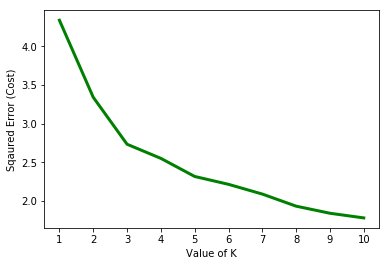

In [501]:
import matplotlib.pyplot as plt
cost =[] 
for i in range(1, 11): 
    X = toronto_manhattan_grouped.drop('Neighborhood', 1)
    KM = KMeans(init="k-means++", n_clusters=i, n_init=12, max_iter = 500) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)         
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xticks(range(1, 11),range(1, 11))
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

**The optimal value of k is 5**

**Apply the k-means clustering algorithm**

In [502]:
# set number of clusters
kclusters = 5

toronto_manhattan_grouped_clustering = toronto_manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 0, 0, 4, 4, 0, 4, 4], dtype=int32)

**Merge the basic toronto location data with the manhattan location data and join it with the dataframe which shows the top 10 venues in each neighbourhood**

In [503]:
# add clustering labels
toronto_manhattan_sorted_neighborhoods.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_manhattan_merged = pd.concat([toronto_data,manhattan_data])

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_manhattan_merged = toronto_manhattan_merged.join(toronto_manhattan_sorted_neighborhoods.set_index('Neighborhood'), on='Neighborhood')

toronto_manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,The Beaches,43.676357,-79.293031,0,Toronto,Trail,Health Food Store,Pub,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
1,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0,Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Grocery Store,Fruit & Vegetable Store,Restaurant,Pub,Pizza Place
2,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,0,Toronto,Pizza Place,Sandwich Place,Park,Sushi Restaurant,Movie Theater,Pet Store,Pub,Liquor Store,Burrito Place,Burger Joint
3,East Toronto,Studio District,43.659526,-79.340923,0,Toronto,Café,Coffee Shop,Gastropub,Bakery,Italian Restaurant,Brewery,American Restaurant,Yoga Studio,Seafood Restaurant,Sandwich Place
4,Central Toronto,Lawrence Park,43.728020,-79.388790,2,Toronto,Park,Lawyer,Swim School,Bus Line,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [504]:
toronto_manhattan_merged.shape

(79, 16)

Reset index

In [505]:
toronto_manhattan_merged = toronto_manhattan_merged.reset_index(drop=True)

Visualize it on a folium map

In [506]:
# create map
map_clusters = folium.Map(zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, city, cluster in zip(toronto_manhattan_merged['Latitude'], toronto_manhattan_merged['Longitude'], toronto_manhattan_merged['Neighborhood'], toronto_manhattan_merged['City'], toronto_manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '-' + city +' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Results

**We are going to list out the neighbourhoods in each cluster**

## Cluster 1

In [529]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 0, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,Toronto,Trail,Health Food Store,Pub,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
1,"The Danforth West,Riverdale",Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Grocery Store,Fruit & Vegetable Store,Restaurant,Pub,Pizza Place
2,"The Beaches West,India Bazaar",Toronto,Pizza Place,Sandwich Place,Park,Sushi Restaurant,Movie Theater,Pet Store,Pub,Liquor Store,Burrito Place,Burger Joint
3,Studio District,Toronto,Café,Coffee Shop,Gastropub,Bakery,Italian Restaurant,Brewery,American Restaurant,Yoga Studio,Seafood Restaurant,Sandwich Place
7,Davisville,Toronto,Dessert Shop,Sandwich Place,Pizza Place,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym,Café,Pharmacy,Seafood Restaurant
25,"Harbord,University of Toronto",Toronto,Café,Bookstore,Bakery,Japanese Restaurant,Sandwich Place,Restaurant,Bar,Chinese Restaurant,Dessert Shop,College Arts Building
26,"Chinatown,Grange Park,Kensington Market",Toronto,Café,Vietnamese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Coffee Shop,Mexican Restaurant,Bakery,Bar,Donut Shop
27,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Toronto,Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Harbor / Marina,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Boutique
31,"Dovercourt Village,Dufferin",Toronto,Bakery,Pharmacy,Grocery Store,Park,Music Venue,Middle Eastern Restaurant,Café,Brewery,Bar,Bank
32,"Little Portugal,Trinity",Toronto,Bar,Restaurant,Coffee Shop,Men's Store,Vietnamese Restaurant,Café,Pizza Place,Asian Restaurant,Yoga Studio,Miscellaneous Shop


### We can observe that there are neighbourhoods corresponding to Toronto and New York. There are 49 neighbourhoods in cluster 1, 14 of them correspond to Toronto and the rest to New York

In [519]:
cluster1 = toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 0, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]
cluster1_cities = list(set(cluster1['City']))
cluster1_neighbourhoods = list(set(cluster1['Neighborhood']))
# Mapping of neighbourhood with city
mydict = dict(zip(cluster1.Neighborhood, cluster1.City))
# Mapping of city with all neighbourhoods
mydict2 = dict()
for key,val in mydict.items():
    if val in mydict2:
        mydict2[val].append(key)
    else:
        mydict2[val] = [key]
print('The number of cities present in cluster 1 are {}'.format(len(cluster1_cities)))
print('\n')
for i,c in enumerate(cluster1_cities):
    print('{0}.{1}'.format(i+1,c))
print('\n')
print('The number of neighbourhoods present in cluster 1 are {}'.format(len(cluster1_neighbourhoods)))
print('\n')
for key,val in mydict2.items():
    print('The number of neighbourhoods in {} are {}'.format(key,len(val)))
    print('\n')
    for i,n in enumerate(val):
        print('{}.{}'.format(i+1,n))
    print('\n')

The number of cities present in cluster 1 are 2


1.Toronto
2.New York


The number of neighbourhoods present in cluster 1 are 49


The number of neighbourhoods in Toronto are 14


1.High Park,The Junction South
2.Davisville
3.Runnymede,Swansea
4.Chinatown,Grange Park,Kensington Market
5.Little Portugal,Trinity
6.Studio District
7.Harbord,University of Toronto
8.The Beaches West,India Bazaar
9.Dovercourt Village,Dufferin
10.CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
11.Parkdale,Roncesvalles
12.Business Reply Mail Processing Centre 969 Eastern
13.The Danforth West,Riverdale
14.The Beaches


The number of neighbourhoods in New York are 35


1.Turtle Bay
2.Hudson Yards
3.Upper East Side
4.Flatiron
5.West Village
6.Manhattanville
7.Little Italy
8.East Harlem
9.Inwood
10.Greenwich Village
11.Sutton Place
12.Gramercy
13.Hamilton Heights
14.Central Harlem
15.Tudor City
16.Noho
17.Stuyvesant Town
18.Chelsea
19.Tribeca
20.Chinatown
21.Lo

## Cluster 2

In [521]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 1, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Moore Park,Summerhill East",Toronto,Park,Playground,Trail,Summer Camp,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
10,Rosedale,Toronto,Park,Playground,Trail,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
23,"Forest Hill North,Forest Hill West",Toronto,Park,Jewelry Store,Trail,Sushi Restaurant,Bus Line,Women's Store,Dim Sum Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


### We can observe that there are neighbourhoods corresponding to Toronto but not New York. There are 3 neighbourhoods of Toronto which have been  listed out.

In [522]:
cluster2 = toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 1, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]
cluster2_cities = list(set(cluster2['City']))
cluster2_neighbourhoods = list(set(cluster2['Neighborhood']))
# Mapping of neighbourhood with city
mydict = dict(zip(cluster2.Neighborhood, cluster2.City))
# Mapping of city with all neighbourhoods
mydict2 = dict()
for key,val in mydict.items():
    if val in mydict2:
        mydict2[val].append(key)
    else:
        mydict2[val] = [key]
print('The number of cities present in cluster 2 are {}'.format(len(cluster2_cities)))
print('\n')
for i,c in enumerate(cluster2_cities):
    print('{0}.{1}'.format(i+1,c))
print('\n')
print('The number of neighbourhoods present in cluster 2 are {}'.format(len(cluster2_neighbourhoods)))
print('\n')
for key,val in mydict2.items():
    print('The number of neighbourhoods in {} are {}'.format(key,len(val)))
    print('\n')
    for i,n in enumerate(val):
        print('{}.{}'.format(i+1,n))
    print('\n')

The number of cities present in cluster 2 are 1


1.Toronto


The number of neighbourhoods present in cluster 2 are 3


The number of neighbourhoods in Toronto are 3


1.Rosedale
2.Moore Park,Summerhill East
3.Forest Hill North,Forest Hill West




## Cluster 3

In [523]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 2, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lawrence Park,Toronto,Park,Lawyer,Swim School,Bus Line,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


### We can observe that there are only neighbourhoods corresponding to Toronto but not New York. There is only one neighbourhood.

In [524]:
cluster3 = toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 2, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]
cluster3_cities = list(set(cluster3['City']))
cluster3_neighbourhoods = list(set(cluster3['Neighborhood']))
# Mapping of neighbourhood with city
mydict = dict(zip(cluster3.Neighborhood, cluster3.City))
# Mapping of city with all neighbourhoods
mydict2 = dict()
for key,val in mydict.items():
    if val in mydict2:
        mydict2[val].append(key)
    else:
        mydict2[val] = [key]
print('The number of cities present in cluster 3 are {}'.format(len(cluster3_cities)))
print('\n')
for i,c in enumerate(cluster3_cities):
    print('{0}.{1}'.format(i+1,c))
print('\n')
print('The number of neighbourhoods present in cluster 3 are {}'.format(len(cluster3_neighbourhoods)))
print('\n')
for key,val in mydict2.items():
    print('The number of neighbourhoods in {} are {}'.format(key,len(val)))
    print('\n')
    for i,n in enumerate(val):
        print('{}.{}'.format(i+1,n))
    print('\n')

The number of cities present in cluster 3 are 1


1.Toronto


The number of neighbourhoods present in cluster 3 are 1


The number of neighbourhoods in Toronto are 1


1.Lawrence Park




## Cluster 4

In [525]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 3, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,Toronto,Garden,Women's Store,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


### We can observe that there are only neighbourhoods corresponding to Toronto but not New York. There is only one neighbourhood.

In [526]:
cluster4 = toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 3, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]
cluster4_cities = list(set(cluster4['City']))
cluster4_neighbourhoods = list(set(cluster4['Neighborhood']))
# Mapping of neighbourhood with city
mydict = dict(zip(cluster4.Neighborhood, cluster4.City))
# Mapping of city with all neighbourhoods
mydict2 = dict()
for key,val in mydict.items():
    if val in mydict2:
        mydict2[val].append(key)
    else:
        mydict2[val] = [key]
print('The number of cities present in cluster 4 are {}'.format(len(cluster4_cities)))
print('\n')
for i,c in enumerate(cluster4_cities):
    print('{0}.{1}'.format(i+1,c))
print('\n')
print('The number of neighbourhoods present in cluster 4 are {}'.format(len(cluster4_neighbourhoods)))
print('\n')
for key,val in mydict2.items():
    print('The number of neighbourhoods in {} are {}'.format(key,len(val)))
    print('\n')
    for i,n in enumerate(val):
        print('{}.{}'.format(i+1,n))
    print('\n')

The number of cities present in cluster 4 are 1


1.Toronto


The number of neighbourhoods present in cluster 4 are 1


The number of neighbourhoods in Toronto are 1


1.Roselawn




## Cluster 5

In [527]:
toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 4, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]

,Neighborhood,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Davisville North,Toronto,Hotel,Department Store,Sandwich Place,Park,Gym,Breakfast Spot,Convenience Store,Food & Drink Shop,Discount Store,Dog Run
6,North Toronto West,Toronto,Sporting Goods Shop,Coffee Shop,Chinese Restaurant,Spa,Shoe Store,Salon / Barbershop,Restaurant,Rental Car Location,Café,Yoga Studio
9,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",Toronto,Pub,Coffee Shop,Pizza Place,American Restaurant,Sushi Restaurant,Restaurant,Fried Chicken Joint,Sports Bar,Liquor Store,Supermarket
11,"Cabbagetown,St. James Town",Toronto,Coffee Shop,Restaurant,Bakery,Italian Restaurant,Café,Pub,Pizza Place,Market,Pet Store,Pharmacy
12,Church and Wellesley,Toronto,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Fast Food Restaurant,Men's Store,Mediterranean Restaurant,Hotel,Gym
13,Harbourfront,Toronto,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Restaurant,Café,Mexican Restaurant,Farmers Market,Event Space
14,"Ryerson,Garden District",Toronto,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Fast Food Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Bakery,Bubble Tea Shop,Plaza
15,St. James Town,Toronto,Coffee Shop,Café,Restaurant,Italian Restaurant,Cocktail Bar,Clothing Store,Hotel,Bakery,Beer Bar,Breakfast Spot
16,Berczy Park,Toronto,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Steakhouse,Beer Bar,Seafood Restaurant,Café,Cheese Shop,Breakfast Spot
17,Central Bay Street,Toronto,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Japanese Restaurant,Juice Bar,Burger Joint,Ice Cream Shop,Chinese Restaurant,Salad Place


### We can observe that there are neighbourhoods corresponding to Toronto and New York. There are 25 neighbourhoods in cluster 5, 20 of them correspond to Toronto and the rest to New York

In [528]:
cluster5 = toronto_manhattan_merged.loc[toronto_manhattan_merged['Cluster Labels'] == 4, toronto_manhattan_merged.columns[[1] + list(range(5, toronto_manhattan_merged.shape[1]))]]
cluster5_cities = list(set(cluster5['City']))
cluster5_neighbourhoods = list(set(cluster5['Neighborhood']))
# Mapping of neighbourhood with city
mydict = dict(zip(cluster5.Neighborhood, cluster5.City))
# Mapping of city with all neighbourhoods
mydict2 = dict()
for key,val in mydict.items():
    if val in mydict2:
        mydict2[val].append(key)
    else:
        mydict2[val] = [key]
print('The number of cities present in cluster 5 are {}'.format(len(cluster5_cities)))
print('\n')
for i,c in enumerate(cluster5_cities):
    print('{0}.{1}'.format(i+1,c))
print('\n')
print('The number of neighbourhoods present in cluster 5 are {}'.format(len(cluster5_neighbourhoods)))
print('\n')
for key,val in mydict2.items():
    print('The number of neighbourhoods in {} are {}'.format(key,len(val)))
    print('\n')
    for i,n in enumerate(val):
        print('{}.{}'.format(i+1,n))
    print('\n')

The number of cities present in cluster 5 are 2


1.Toronto
2.New York


The number of neighbourhoods present in cluster 5 are 25


The number of neighbourhoods in Toronto are 20


1.Christie
2.Berczy Park
3.Queen's Park
4.Harbourfront East,Toronto Islands,Union Station
5.Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
6.Adelaide,King,Richmond
7.Harbourfront
8.Commerce Court,Victoria Hotel
9.Church and Wellesley
10.Brockton,Exhibition Place,Parkdale Village
11.St. James Town
12.North Toronto West
13.Central Bay Street
14.The Annex,North Midtown,Yorkville
15.Davisville North
16.Cabbagetown,St. James Town
17.Design Exchange,Toronto Dominion Centre
18.First Canadian Place,Underground city
19.Ryerson,Garden District
20.Stn A PO Boxes 25 The Esplanade


The number of neighbourhoods in New York are 5


1.Financial District
2.Morningside Heights
3.Marble Hill
4.Roosevelt Island
5.Battery Park City




## 5. Discussion

We can observe that cluster 2, cluster 3 and cluster 4 consists of neighbourhoods corresponding to Toronto.There are no neighbourhoods corresponding to New York. The only clusters which consists of neighbourhoods of both the cities are cluster 21 and cluster 5. Hence, the observations/suggestions which we can make are- <br>

1. There are 14 neighbourhoods in Toronto which are similar to 35 neighbourhoods in Manhattan(New York) in cluster 1.
2. There are 20 neighbourhoods in Toronto which are similar to 5 neighbourhoods in Manhattan(New York) in cluster 5.
2. There is no similarity between the other 5 neighbourhoods of Toronto present in cluster 2,cluster 3,cluster 4 and the neighbourhoods of Manhattan(New York).
3. Hence, we can recommend the above observations we have made to the people who are looking for neighbourhoods of Toronto which are similar to New York or vice versa.

## 6. Conclusion

<table>
    </table>

We can make the below conclusions from the clustering analysis-
1. There are 14 neighbourhoods in Toronto which are similar to 35 neighbourhoods in New York.
2. There are 20 neighbourhoods in Toronto which are similar to 5 neighbourhoods in New York.

Hence, the below 14 neighbourhoods of Toronto are similar to the below mentioned 35 neighbourhoods of New York.

The 14 neighbourhoods of Toronto:

1. High Park,The Junction South
2. Davisville
3. Runnymede,Swansea
4. Chinatown,Grange Park,Kensington Market
5. Little Portugal,Trinity
6. Studio District
7. Harbord,University of Toronto
8. The Beaches West,India Bazaar
9. Dovercourt Village,Dufferin
10. CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
11. Parkdale,Roncesvalles
12. Business Reply Mail Processing Centre 969 Eastern
13. The Danforth West,Riverdale
14. The Beaches

The 35 neighbourhoods of New York

1. Turtle Bay
2. Hudson Yards
3. Upper East Side
4. Flatiron
5. West Village
6. Manhattanville
7. Little Italy
8. East Harlem
9. Inwood
10. Greenwich Village
11. Sutton Place
12. Gramercy
13. Hamilton Heights
14. Central Harlem
15. Tudor City
16. Noho
17. Stuyvesant Town
18. Chelsea
19. Tribeca
20. Chinatown
21. Lower East Side
22. Midtown
23. Clinton
24. Upper West Side
25. Washington Heights
26. Carnegie Hill
27. Civic Center
28. Murray Hill
29. Lenox Hill
30. Lincoln Square
31. Yorkville
32. Midtown South
33. East Village
34. Manhattan Valley
35. Soho

Hence, the below 20 neighbourhoods of Toronto are similar to the below mentioned 5 neighbourhoods of New York.

The 20 neighbourhoods of Toronto:

1. Christie
2. Berczy Park
3. Queen's Park
4. Harbourfront East,Toronto Islands,Union Station
5. Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
6. Adelaide,King,Richmond
7. Harbourfront
8. Commerce Court,Victoria Hotel
9. Church and Wellesley
10. Brockton,Exhibition Place,Parkdale Village
11. St. James Town
12. North Toronto West
13. Central Bay Street
14. The Annex,North Midtown,Yorkville
15. Davisville North
16. Cabbagetown,St. James Town
17. Design Exchange,Toronto Dominion Centre
18. First Canadian Place,Underground city
19. Ryerson,Garden District
20. Stn A PO Boxes 25 The Esplanade

The 5 neighbourhoods of New York:

1. Financial District
2. Morningside Heights
3. Marble Hill
4. Roosevelt Island
5. Battery Park City

**My foursquare API credentials and the functions which will be used in data processing. This data has been put at the end of notebook as per convenience**

In [515]:
CLIENT_ID = 'VO0GVZAAV5DGAAQXY1QTLLK4HKEKJWLI1PLW4RTQF1BMEQAQ' # your Foursquare ID
CLIENT_SECRET = 'WBQ1OUCX5ESDWWIK4MIIOKRWHHBNJ5VZRRPMYWPMUB3KNBT0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [516]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [517]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [518]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]